In [1]:
from google.oauth2 import service_account
import pandas as pd
import pandas_gbq as gbq 
from pandas_gbq import to_gbq, read_gbq
import matplotlib.pyplot as plt

credentials_path = 'token.json'
# Authenticate with your credentials
credentials = service_account.Credentials.from_service_account_file(
    credentials_path, scopes=['https://www.googleapis.com/auth/bigquery'])
# Set the credentials for pandas_gbq
gbq.context.credentials = credentials

In [2]:
df = read_gbq(f"""

SELECT *
FROM capstone-402105.capstone.final_lgbm_output

""",project_id='capstone-402105', dialect='standard')

/Users/ryantan/Documents/github/Capstone/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Downloading: 100%|██████████|


In [3]:
df.head()

,1_month,3_months,6_months,12_months,24_months,36_months,60_months,CompNo,EventDate
0,0.000022,0.000087,0.000386,0.001671,0.005755,0.011117,0.041862,49535,2022-01-31 00:00:00+00:00
1,0.000041,0.000222,0.000571,0.001750,0.009321,0.017166,0.038176,30444,2022-01-31 00:00:00+00:00
2,0.000014,0.000054,0.000166,0.000575,0.002565,0.004985,0.012876,30415,2022-01-31 00:00:00+00:00
3,0.000020,0.000061,0.000236,0.001184,0.003199,0.010436,0.020249,30404,2022-01-31 00:00:00+00:00
4,0.000013,0.000053,0.000152,0.000444,0.001002,0.001953,0.006019,27120,2022-01-31 00:00:00+00:00


In [6]:
df['date'] = pd.to_datetime(df['EventDate'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [7]:
df.head()

,1_month,3_months,6_months,12_months,24_months,36_months,60_months,CompNo,EventDate,date,year,month
0,0.000022,0.000087,0.000386,0.001671,0.005755,0.011117,0.041862,49535,2022-01-31 00:00:00+00:00,2022-01-31 00:00:00+00:00,2022,1
1,0.000041,0.000222,0.000571,0.001750,0.009321,0.017166,0.038176,30444,2022-01-31 00:00:00+00:00,2022-01-31 00:00:00+00:00,2022,1
2,0.000014,0.000054,0.000166,0.000575,0.002565,0.004985,0.012876,30415,2022-01-31 00:00:00+00:00,2022-01-31 00:00:00+00:00,2022,1
3,0.000020,0.000061,0.000236,0.001184,0.003199,0.010436,0.020249,30404,2022-01-31 00:00:00+00:00,2022-01-31 00:00:00+00:00,2022,1
4,0.000013,0.000053,0.000152,0.000444,0.001002,0.001953,0.006019,27120,2022-01-31 00:00:00+00:00,2022-01-31 00:00:00+00:00,2022,1


In [14]:
y = df.loc[(df['CompNo'] == 30444) & (df['year'] == 2022) & (df['month'] == 1)]
y = y.iloc[:, 0:7]
y = y.T.to_numpy().flatten()
y

array([4.14392248e-05, 2.22181131e-04, 5.70749853e-04, 1.74968246e-03,
       9.32066110e-03, 1.71657189e-02, 3.81764763e-02])

In [18]:
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
from matplotlib.pyplot import plot

def plot_nelson_siegel(y):
    """
    Plot nelson siegel curve for 1,3,6,12,24,36 and 60 month probability of default
    :param y: Numpy array of default probabilities 
    """
    t = np.array([1, 3, 6, 12, 24, 36, 60])
    assert len(y == len(t)), f"Length of y array not equal to {len(t)}"
    curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
    assert status.success
    plot(t, curve(t))

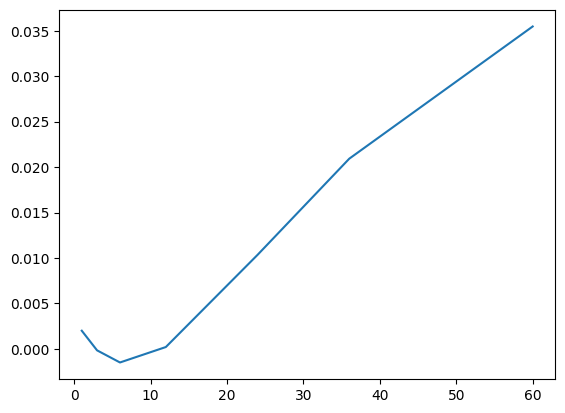

In [19]:
plot_nelson_siegel(y)